In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [124]:
file_path = 'C:\\Users\\Administrator\\Desktop\\data_analyst\\week18\\kagglechallange\\sales.csv'
sales = pd.read_csv(file_path, index_col=0)

In [125]:
sales.head(5)

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
425390,366,4,2013-04-18,517,1,0,0,0,4422
291687,394,6,2015-04-11,694,1,0,0,0,8297
411278,807,4,2013-08-29,970,1,1,0,0,9729
664714,802,2,2013-05-28,473,1,1,0,0,6513
540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [126]:
def extract_date_components(sales, date):
    # converting date column into data forman
    sales['date'] = pd.to_datetime(sales['date'])
    
    # getting column for year, month and day
    sales['year'] = sales['date'].dt.year
    sales['month'] = sales['date'].dt.month
    sales['day'] = sales['date'].dt.day
    
    return sales

In [127]:
sales = extract_date_components(sales, 'date')

In [128]:
sales.head(5)

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,year,month,day
425390,366,4,2013-04-18,517,1,0,0,0,4422,2013,4,18
291687,394,6,2015-04-11,694,1,0,0,0,8297,2015,4,11
411278,807,4,2013-08-29,970,1,1,0,0,9729,2013,8,29
664714,802,2,2013-05-28,473,1,1,0,0,6513,2013,5,28
540835,726,4,2013-10-10,1068,1,1,0,0,10882,2013,10,10


In [129]:
# Dropping date column
sales = sales.drop(columns=['date'])

In [130]:
sales.head(5)

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,year,month,day
425390,366,4,517,1,0,0,0,4422,2013,4,18
291687,394,6,694,1,0,0,0,8297,2015,4,11
411278,807,4,970,1,1,0,0,9729,2013,8,29
664714,802,2,473,1,1,0,0,6513,2013,5,28
540835,726,4,1068,1,1,0,0,10882,2013,10,10


In [131]:
sales['state_holiday'].unique()

array(['0', 'a', 'c', 'b'], dtype=object)

In [132]:
# replacing a, b and c valus with 1

def map_to_binary(column):
    # mapping dictionary
    mapping = {'0': 0, 'a': 1, 'b': 1, 'c': 1}
    
    column = column.map(mapping).fillna(column)
    
    return column

In [133]:
sales['state_holiday'] = map_to_binary(sales['state_holiday'])

In [134]:
sales['state_holiday'].unique()

array([0, 1], dtype=int64)

In [135]:
# checking for NaN
sales.isna().sum()

store_ID               0
day_of_week            0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
year                   0
month                  0
day                    0
dtype: int64

In [136]:
sales.duplicated().sum()

0

In [137]:
sales.dtypes

store_ID               int64
day_of_week            int64
nb_customers_on_day    int64
open                   int64
promotion              int64
state_holiday          int64
school_holiday         int64
sales                  int64
year                   int32
month                  int32
day                    int32
dtype: object

In [138]:
# checking correlation

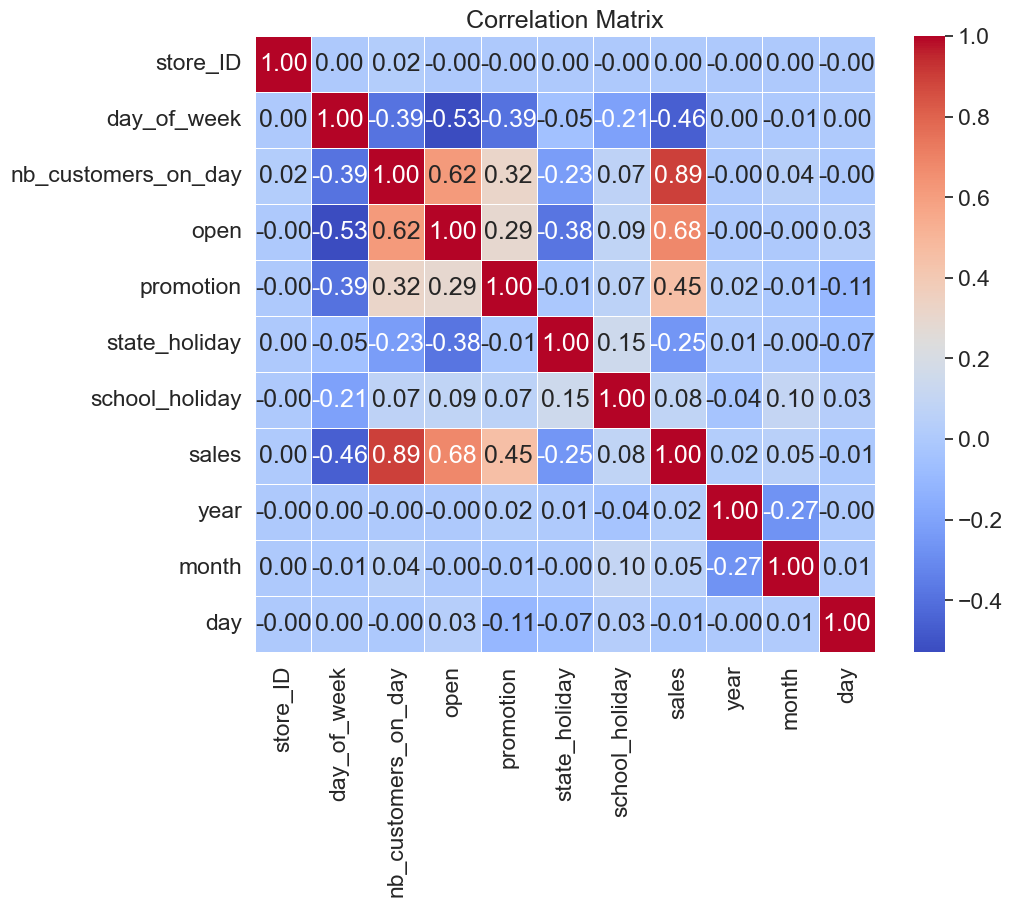

In [139]:
correlation_matrix = sales.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [140]:
target = sales.pop('sales')
sales.insert(len(sales.columns), 'sales', target)

In [141]:
numeric_columns = sales.select_dtypes(include=['int64', 'float64']).columns
num_corr = sales[numeric_columns].corr()

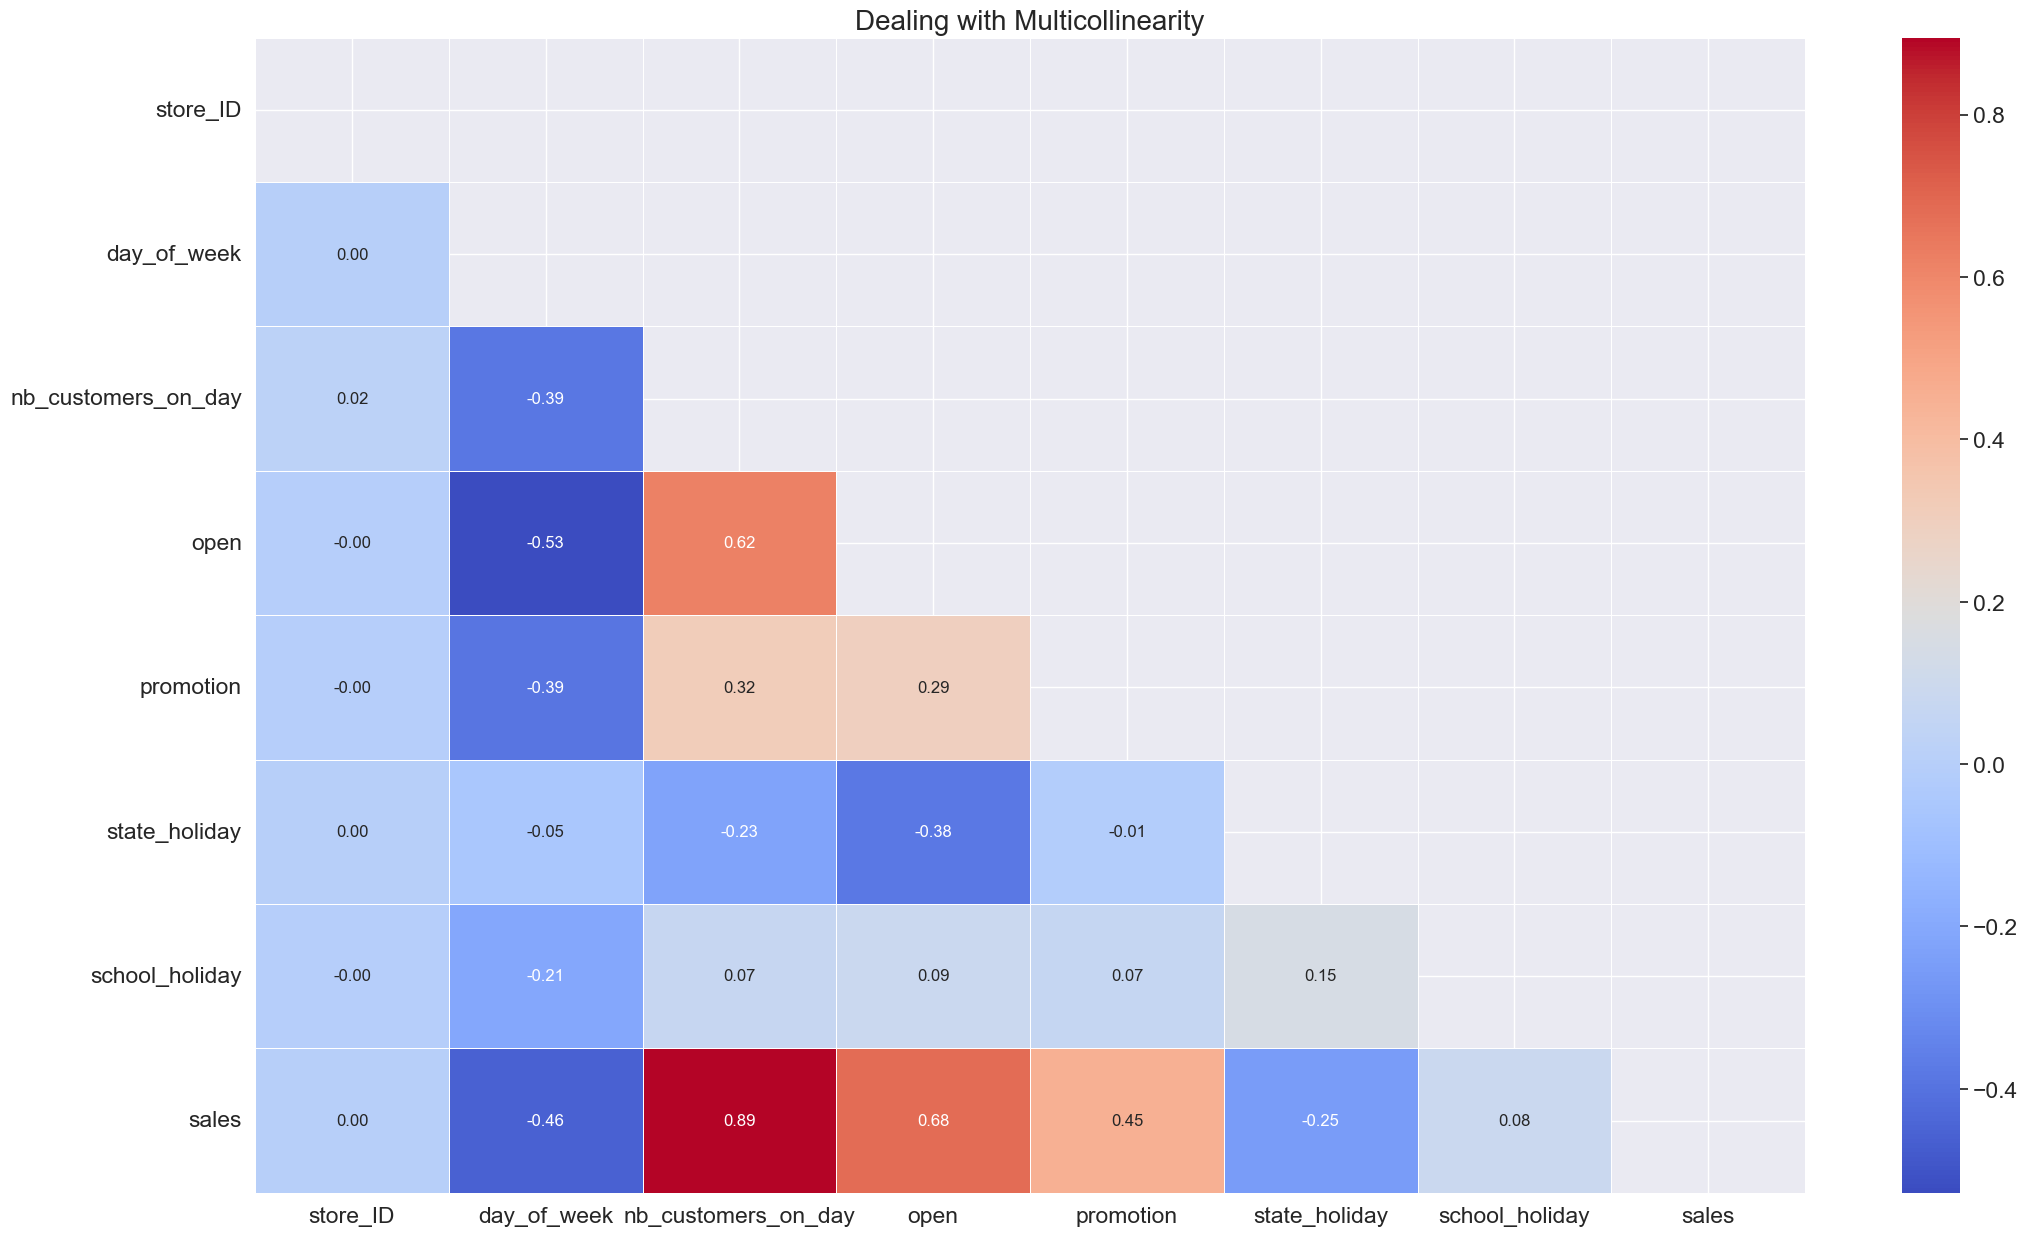

In [142]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size
ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()



In [143]:
df_corr = round(sales.corr(), 2)

In [144]:
sorted_corr = df_corr.sort_values('sales', ascending=False)

In [145]:
sorted_corr

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,year,month,day,sales
sales,0.00,-0.46,0.89,0.68,0.45,-0.25,0.08,0.02,0.05,-0.01,1.00
nb_customers_on_day,0.02,-0.39,1.00,0.62,0.32,-0.23,0.07,-0.00,0.04,-0.00,0.89
open,-0.00,-0.53,0.62,1.00,0.29,-0.38,0.09,-0.00,-0.00,0.03,0.68
promotion,-0.00,-0.39,0.32,0.29,1.00,-0.01,0.07,0.02,-0.01,-0.11,0.45
school_holiday,-0.00,-0.21,0.07,0.09,0.07,0.15,1.00,-0.04,0.10,0.03,0.08
month,0.00,-0.01,0.04,-0.00,-0.01,-0.00,0.10,-0.27,1.00,0.01,0.05
year,-0.00,0.00,-0.00,-0.00,0.02,0.01,-0.04,1.00,-0.27,-0.00,0.02
store_ID,1.00,0.00,0.02,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00
day,-0.00,0.00,-0.00,0.03,-0.11,-0.07,0.03,-0.00,0.01,1.00,-0.01
state_holiday,0.00,-0.05,-0.23,-0.38,-0.01,1.00,0.15,0.01,-0.00,-0.07,-0.25


In [146]:
# there are no strong correlation in our features

In [147]:
# spliting for testing sets
X = sales.drop(columns=['sales'])  # Features (all columns except 'sales')
y = sales['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [148]:
# scaling the data with standart scaler
def scale_data(training, testing, columns):

    scaler = StandardScaler().fit(training[columns])
    training[columns] = scaler.transform(training[columns])
    testing[columns] = scaler.transform(testing[columns])

    return training, testing, scaler

X_train_scaled, X_test_scaled, scaler = scale_data(X_train, X_test, ['nb_customers_on_day'])

In [149]:
lin_reg = LinearRegression()
knn_reg = KNeighborsRegressor()
tree_reg = DecisionTreeRegressor(random_state=1)
voting_reg = VotingRegressor(
estimators=[('lr', lin_reg), ('dt', tree_reg), ('knn', knn_reg)])
voting_reg.fit(X_train, y_train)
tree_reg.fit(X_train_scaled, y_train)
tree_train_score = tree_reg.score(X_train_scaled, y_train)
tree_test_score = tree_reg.score(X_test_scaled, y_test)
print('Train score for Tree Regression:', tree_reg.score(X_train_scaled, y_train))
print('Test score for Tree Regression:', tree_reg.score(X_test, y_test))
print('Train score for Voting Regression:', voting_reg.score(X_train, y_train))
print('Test score for VOting Regression:', voting_reg.score(X_test, y_test))
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
print('Train score KNeighborsRegressor:', knn_reg.score(X_train, y_train))
print('Test score KNeighborsRegressor:', knn_reg.score(X_test, y_test))

Train score for Tree Regression: 1.0
Test score for Tree Regression: 0.9028982125379155
Train score for Voting Regression: 0.9593931655665477
Test score for VOting Regression: 0.9186588796311497
Train score KNeighborsRegressor: 0.9009930178317358
Test score KNeighborsRegressor: 0.8337946276204541


In [150]:
# we can see that for Tree Regression the model is overfit and we need to choose another model in this case. In this case Voting Regression has the best model so it is better to chose this model


In [151]:
# checking Linear Regression model

In [152]:
# Defining labels and features
features = ['store_ID', 'day_of_week', 'nb_customers_on_day', 'open', 'promotion', 'state_holiday', 'school_holiday', 'year', 'month', 'day']
label = 'sales'

# X and y
X = sales[features]
y = sales[label]

# Spliting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# making prediction
y_pred = linear_model.predict(X_test_scaled)

# evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2183615.664341902
R-squared: 0.8522753555063207


In [153]:
# checking training and testing scores
train_score = linear_model.score(X_train_scaled, y_train)
test_score = linear_model.score(X_test_scaled, y_test)

In [154]:
train_score

0.8549391382885325

In [155]:
test_score

0.8522753555063207

In [156]:
# checking KNeighborsRegressor model regression 

In [157]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# create knn, don't forget Hyperparameter
knn = KNeighborsRegressor(n_neighbors=3)

In [158]:
# fitting the model and predicting the test set

In [159]:
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
pred

array([ 8644.66666667,     0.        ,  3646.66666667, ...,
       11466.33333333,  8351.        ,  6783.        ])

In [160]:
np.array(y_test)

array([10108,     0,  4232, ..., 10476,  8641,  8484], dtype=int64)

In [161]:
np.sqrt(mean_squared_error(y_test,pred))

1344.865734379265

In [162]:
# pickling Voting regression

In [163]:
import pickle

In [164]:
with open('voting_reg_model.pkl', 'wb') as model_file:
    pickle.dump(voting_reg, model_file)

In [165]:
predicting_sales = pd.read_csv('validation_for students.csv')

In [166]:
predicting_sales.head(5)

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,01/03/2015,0,0,0,0,0
1,558468,27,7,29/12/2013,0,0,0,0,0
2,76950,404,3,19/03/2014,657,1,1,0,0
3,77556,683,2,29/01/2013,862,1,0,0,0
4,456344,920,3,19/03/2014,591,1,1,0,0


In [167]:
def extract_date_components(predicting_sales, date):
    # converting date column into data forman
    predicting_sales['date'] = pd.to_datetime(predicting_sales['date'], format='%d/%m/%Y')
    
    # getting column for year, month and day
    predicting_sales['year'] = predicting_sales['date'].dt.year
    predicting_sales['month'] = predicting_sales['date'].dt.month
    predicting_sales['day'] = predicting_sales['date'].dt.day
    
    return predicting_sales

In [168]:
predicting_sales = extract_date_components(predicting_sales, 'date')

In [169]:
predicting_sales.head(5)

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,year,month,day
0,272371,415,7,2015-03-01,0,0,0,0,0,2015,3,1
1,558468,27,7,2013-12-29,0,0,0,0,0,2013,12,29
2,76950,404,3,2014-03-19,657,1,1,0,0,2014,3,19
3,77556,683,2,2013-01-29,862,1,0,0,0,2013,1,29
4,456344,920,3,2014-03-19,591,1,1,0,0,2014,3,19


In [170]:
predicting_sales.isna().sum()

index                  0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
year                   0
month                  0
day                    0
dtype: int64

In [171]:
predicting_sales = predicting_sales.drop(columns=['date'])

In [172]:
predicting_sales.shape

(71205, 11)

In [173]:
# replacing a, b and c valus with 1

def map_to_binary(column):
    # mapping dictionary
    mapping = {'0': 0, 'a': 1, 'b': 1, 'c': 1}
    
    column = column.map(mapping).fillna(column)
    
    return column

In [174]:
predicting_sales['state_holiday'] = map_to_binary(predicting_sales['state_holiday'])

In [175]:
sales['state_holiday'].unique()

array([0, 1], dtype=int64)

In [176]:
# using best pickled model 
with open('voting_reg_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [177]:
y_pred = loaded_model.predict(X_test)

In [178]:
y_pred

array([1040630.58530812,    4105.43251703,  343810.3752042 , ...,
       1017583.96713852,  897445.32331348,  723516.84663331])

In [179]:
y_pred = pd.DataFrame(y_pred)


In [180]:
y_pred['index'] = predicting_sales['index']

In [181]:
predicted_sales = pd.DataFrame(y_pred)


In [182]:
predicted_sales

,0,index
0,1.040631e+06,272371.0
1,4.105433e+03,558468.0
2,3.438104e+05,76950.0
3,4.046910e+05,77556.0
4,6.487088e+05,456344.0
...,...,...
128163,5.924310e+05,NaN
128164,3.050365e+03,NaN
128165,1.017584e+06,NaN
128166,8.974453e+05,NaN


In [183]:
predicted_sales2 = predicted_sales.dropna()

In [184]:
predicted_sales2

,0,index
0,1.040631e+06,272371.0
1,4.105433e+03,558468.0
2,3.438104e+05,76950.0
3,4.046910e+05,77556.0
4,6.487088e+05,456344.0
...,...,...
71200,6.225547e+05,59062.0
71201,9.141909e+05,687449.0
71202,1.369116e+06,207393.0
71203,7.061141e+05,233378.0


In [190]:
csv_file_path = 'predicted_sales2.csv'
df.to_csv(csv_file_path, index=True)